In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from keras import models
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.utils import to_categorical

In [3]:
data = pd.read_csv('fer2013.csv')

In [4]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [11]:
def prepare_data(data):
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

In [12]:
data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [13]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [14]:
train_image_array, train_image_label = prepare_data(data[data['Usage']=='Training'])
val_image_array, val_image_label = prepare_data(data[data['Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(data[data['Usage']=='PublicTest'])

In [15]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

In [16]:
train_labels = to_categorical(train_image_label)
val_labels = to_categorical(val_image_label)
test_labels = to_categorical(test_image_label)

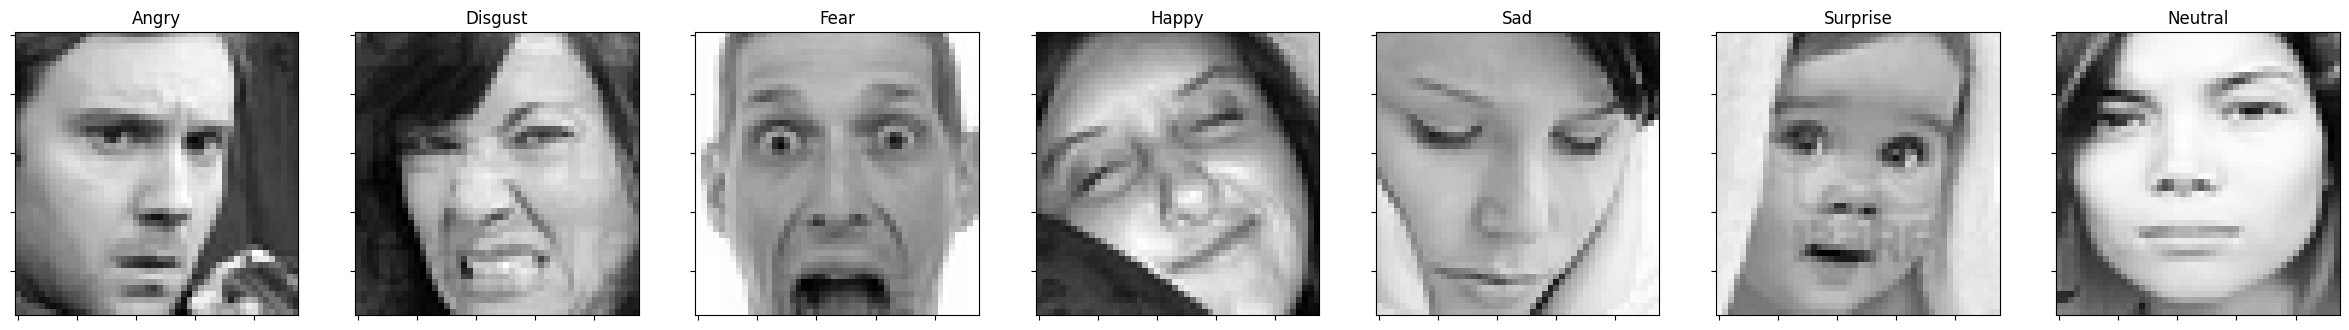

In [17]:
plot_all_emotions()

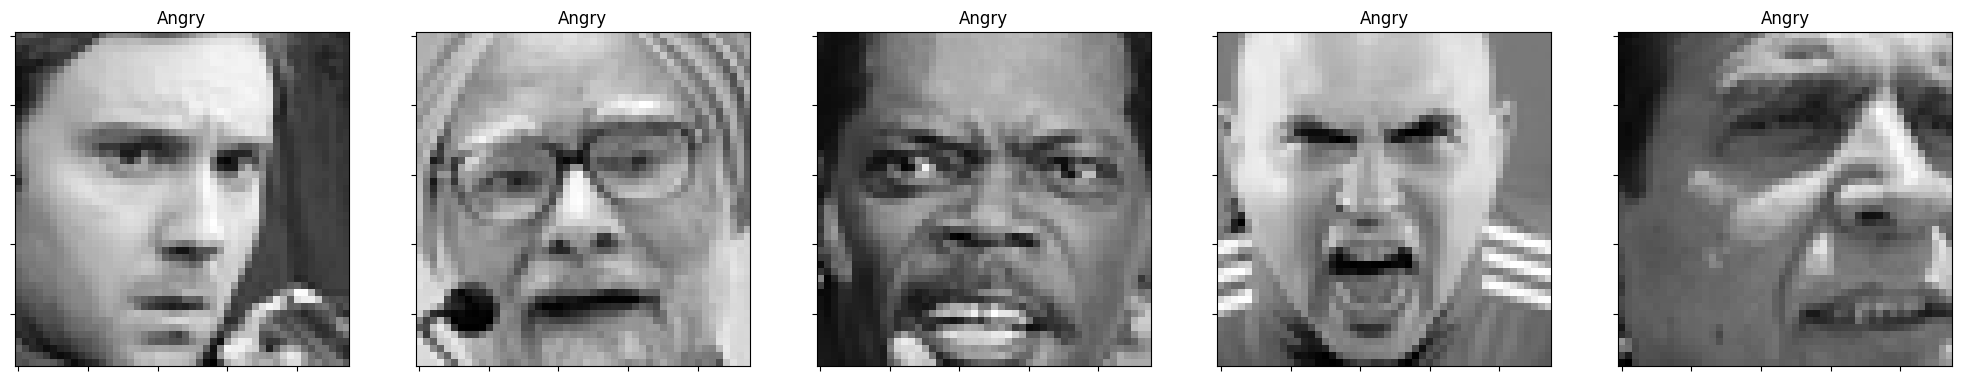

In [18]:
plot_examples(label=0)

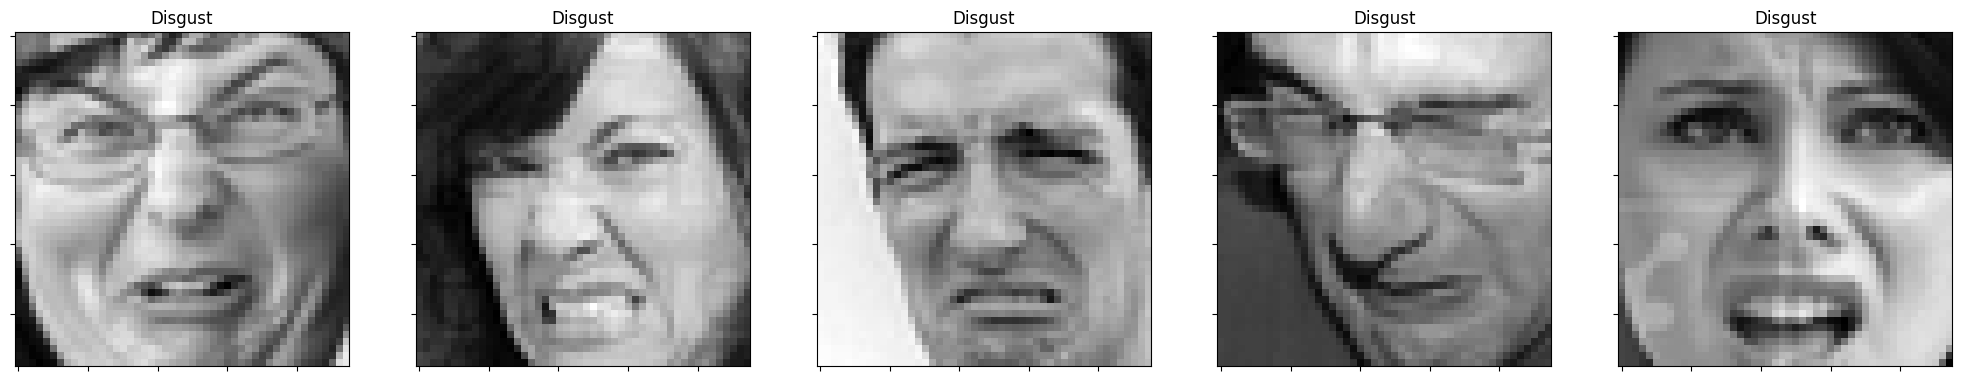

In [19]:
plot_examples(label=1)

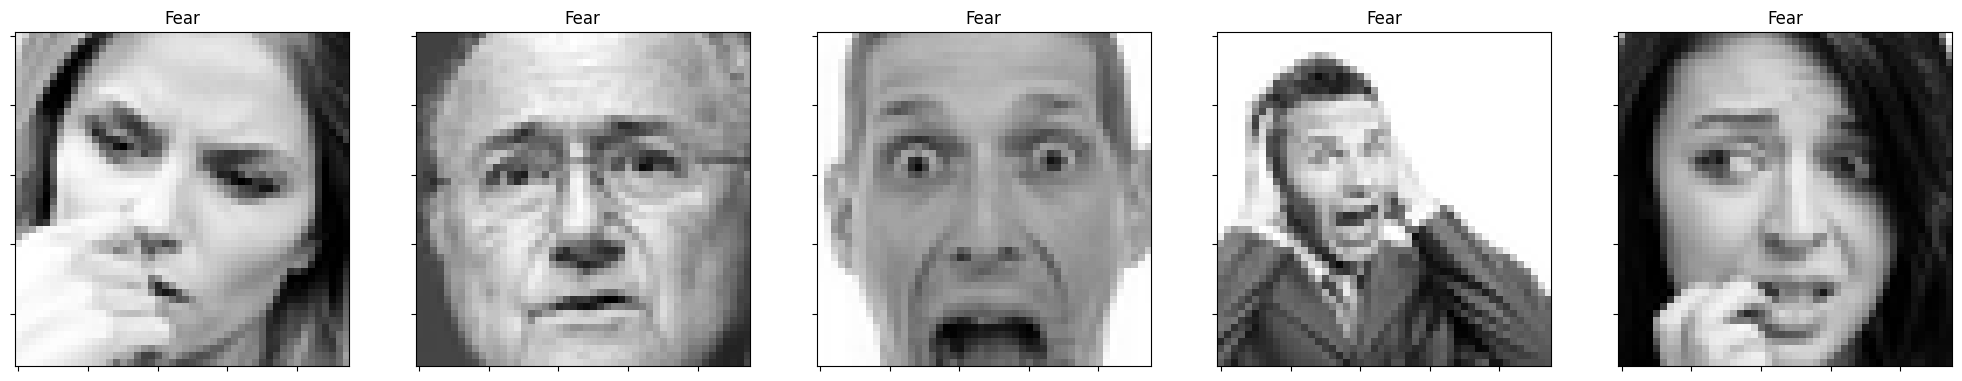

In [20]:
plot_examples(label=2)

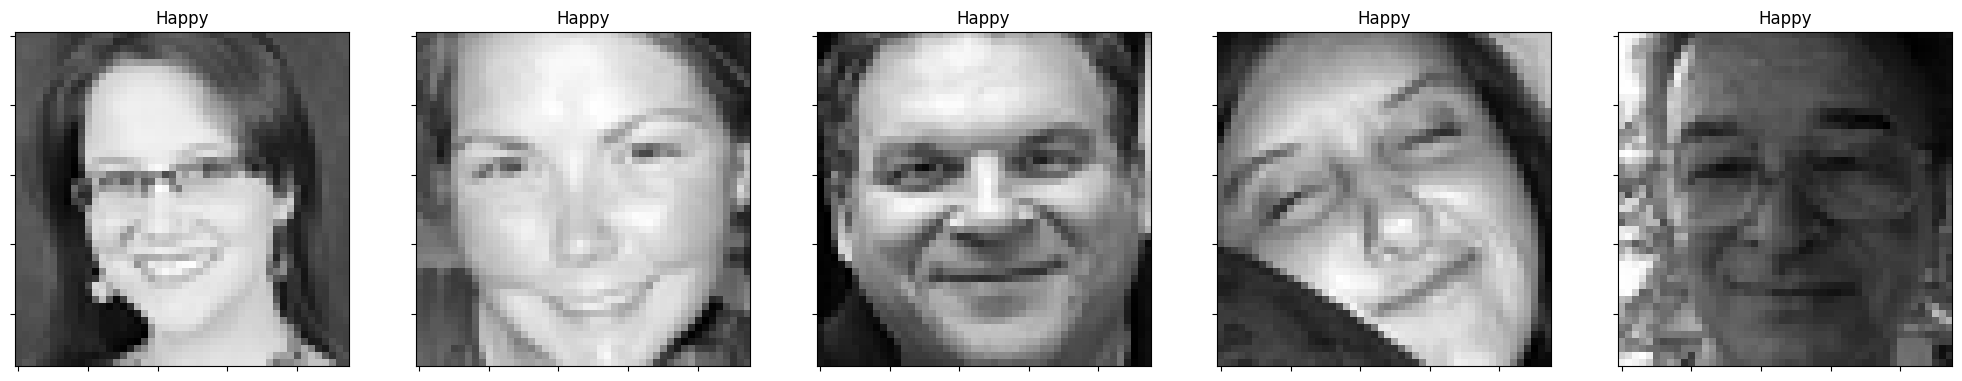

In [21]:
plot_examples(label=3)

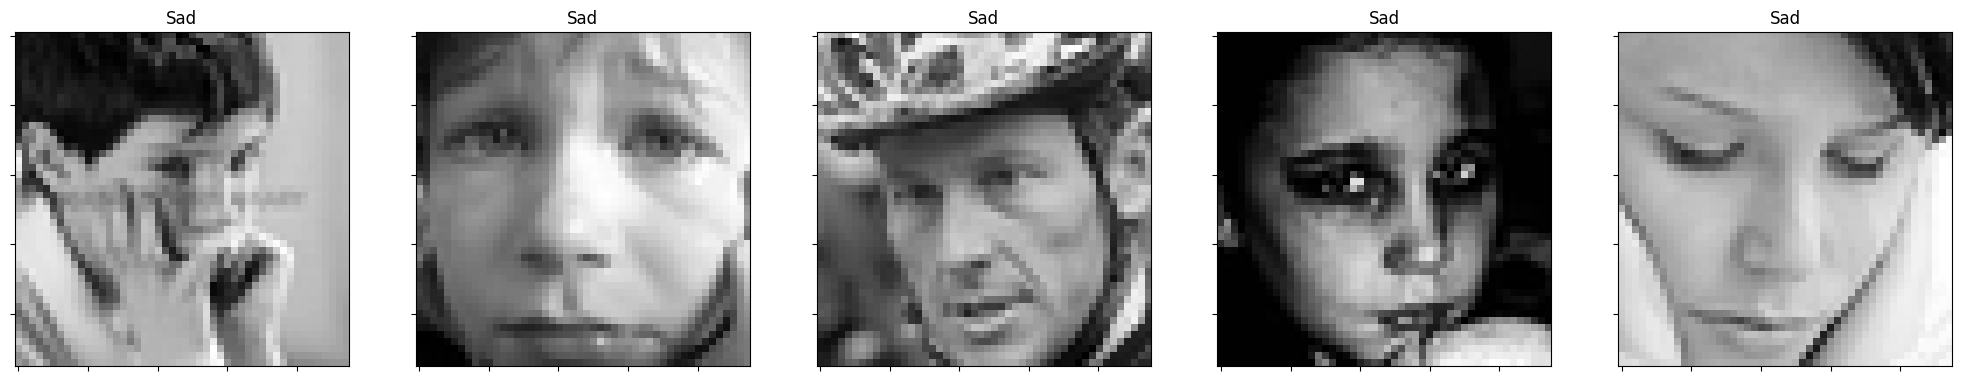

In [22]:
plot_examples(label=4)

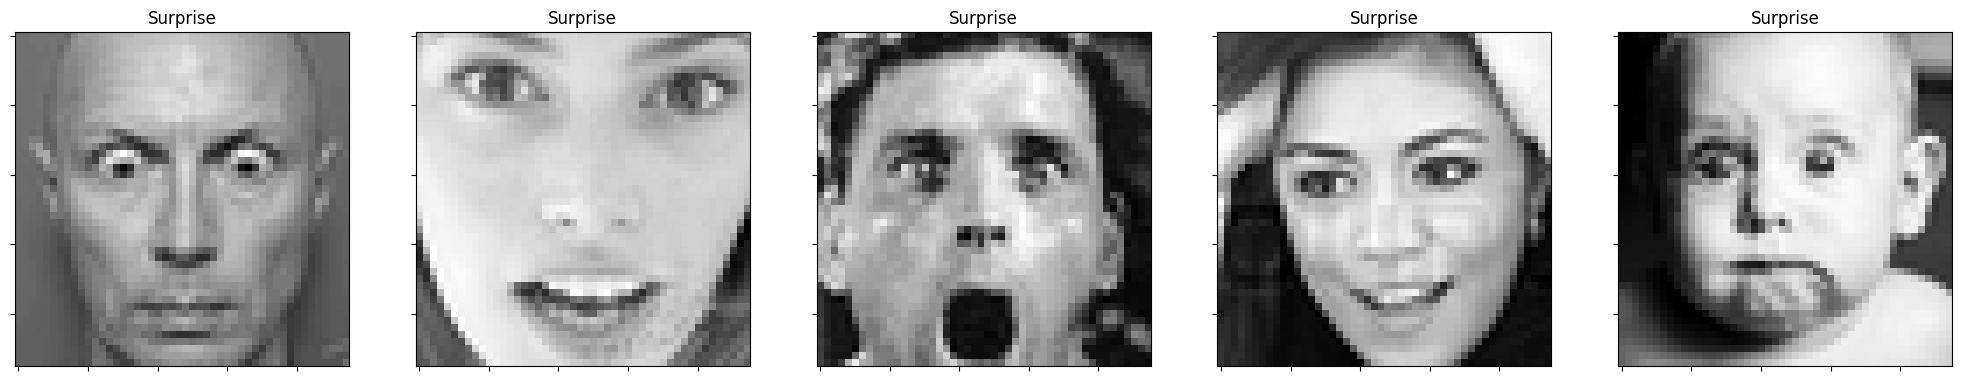

In [23]:
plot_examples(label=5)

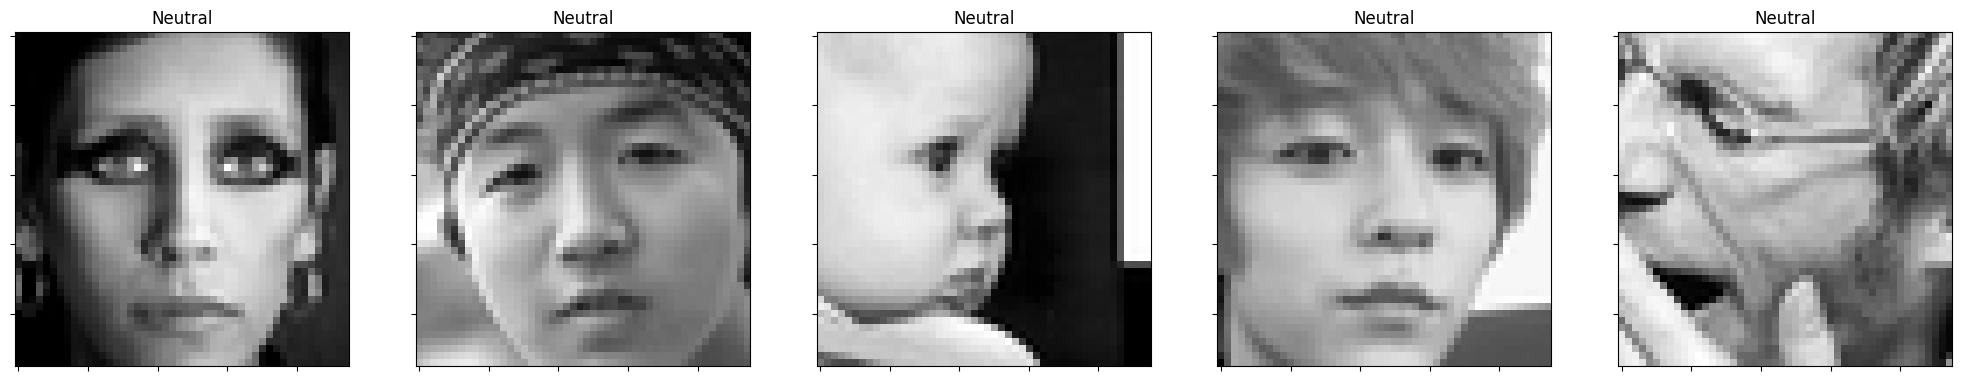

In [24]:
plot_examples(label=6)

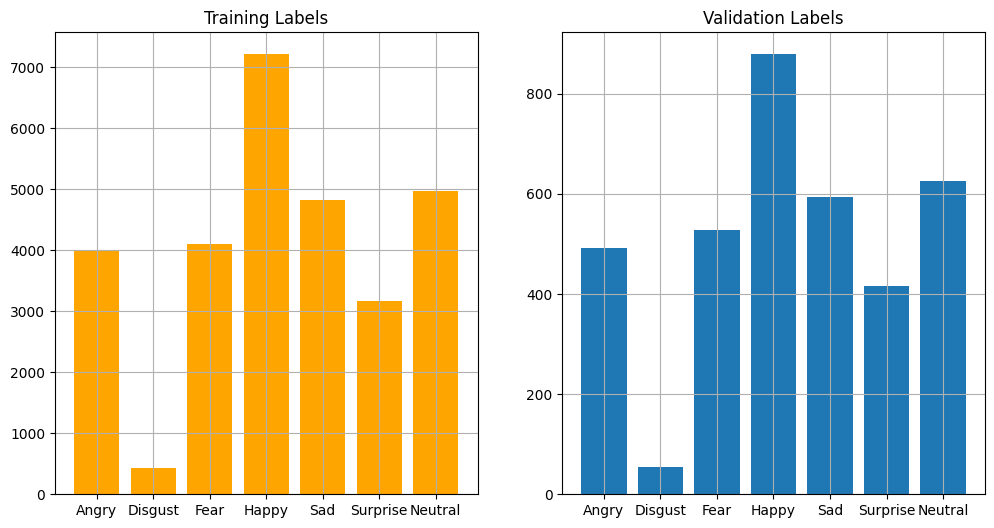

In [25]:
plot_compare_distributions(train_labels, val_labels, title1='Training Labels', title2='Validation Labels')

In [27]:
class_weight = dict(zip(range(0, 7), (((data[data['Usage']=='Training']['emotion'].value_counts()).sort_index())/len(data[data['Usage']=='Training']['emotion'])).tolist()))

In [28]:
class_weight

{0: 0.1391549688251071,
 1: 0.01518687519593159,
 2: 0.14270786164617366,
 3: 0.2513149186666202,
 4: 0.16823992476226968,
 5: 0.11045316799609878,
 6: 0.17294228290779895}

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(48,48,1)),
    tf.keras.layers.experimental.preprocessing.RandomContrast(factor = 0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal'),
    
    tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(16,5,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2),
    
    tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(emotions), activation='softmax'),    
])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 random_contrast (RandomCon  (None, 48, 48, 1)         0         
 trast)                                                          
                                                                 
 random_flip (RandomFlip)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 48, 48, 16)       

In [39]:
from sklearn.metrics import f1_score

def f1(y_true, y_pred):
    return f1_score(y_true=np.argmax(np.array(y_true), axis=1), y_pred=np.argmax(np.array(y_pred),axis=1), average='macro')

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', 
              metrics=['accuracy',f1], run_eagerly=True)

earlystop = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=1e-4, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=1e-7)

In [42]:
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weight,
                    epochs=25,
                    batch_size=128,
                    callbacks=[earlystop, lr])

Epoch 1/25
225/225 [==============================] - 283s 1s/step - loss: 0.2727 - accuracy: 0.3168 - f1: 0.2085 - val_loss: 4.0375 - val_accuracy: 0.2449 - val_f1: 0.0601 - lr: 0.0010
Epoch 2/25
225/225 [==============================] - 289s 1s/step - loss: 0.2446 - accuracy: 0.3914 - f1: 0.2874 - val_loss: 3.1947 - val_accuracy: 0.2449 - val_f1: 0.0607 - lr: 0.0010
Epoch 3/25
225/225 [==============================] - 270s 1s/step - loss: 0.2259 - accuracy: 0.4366 - f1: 0.3360 - val_loss: 2.0183 - val_accuracy: 0.3352 - val_f1: 0.1731 - lr: 0.0010
Epoch 4/25
225/225 [==============================] - 279s 1s/step - loss: 0.2129 - accuracy: 0.4671 - f1: 0.3699 - val_loss: 1.7476 - val_accuracy: 0.3996 - val_f1: 0.2825 - lr: 0.0010
Epoch 5/25
225/225 [==============================] - 270s 1s/step - loss: 0.2022 - accuracy: 0.4966 - f1: 0.4016 - val_loss: 1.3734 - val_accuracy: 0.4943 - val_f1: 0.3958 - lr: 0.0010
Epoch 6/25
225/225 [==============================] - 269s 1s/step - l

In [58]:
metrics= model.evaluate(test_images, test_labels)

113/113 [==============================] - 52s 458ms/step - loss: 1.2669 - accuracy: 0.5280 - f1: 0.4425


In [45]:
pred_test_labels = model.predict(test_images)

113/113 [==============================] - 4s 32ms/step


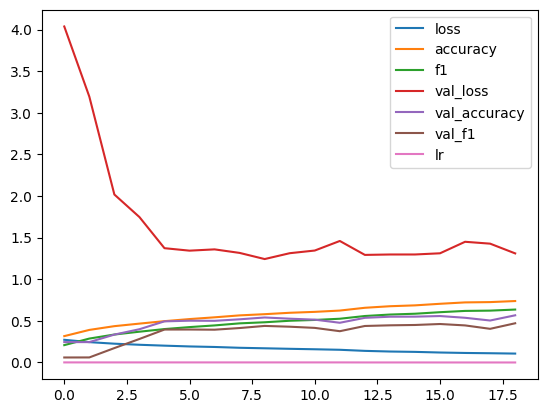

In [56]:
for key in history.history.keys():
    plt.plot(history.history[key], label=key)
plt.legend()

In [54]:
model.evaluate(test_images, test_labels)
test_pred = model.predict(test_images)
confusion_matrix(y_true=test_image_label, y_pred=np.argmax(test_pred,axis=1))

113/113 [==============================] - 4s 33ms/step


array([[128,   0,  36,  73, 131,  21,  78],
       [ 18,   0,   7,   6,  16,   1,   8],
       [ 38,   0, 115,  66, 155,  46,  76],
       [ 10,   0,  16, 729,  60,  17,  63],
       [ 39,   0,  35, 100, 335,  14, 130],
       [ 11,   0,  35,  32,  26, 283,  28],
       [ 39,   0,  22, 102, 130,   9, 305]], dtype=int64)

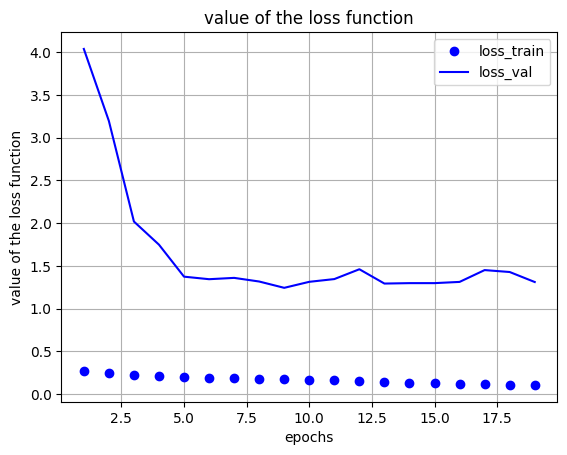

In [59]:
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()

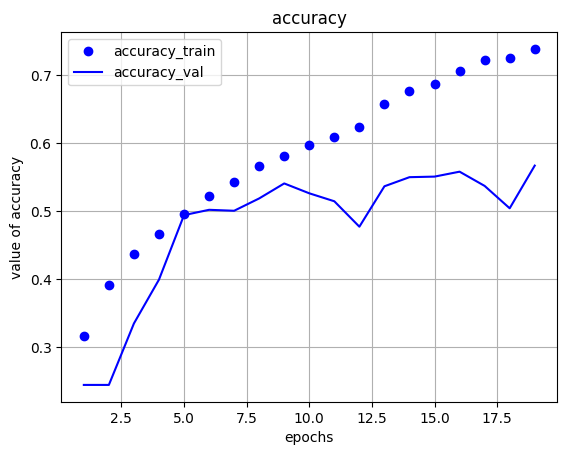

In [47]:
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()

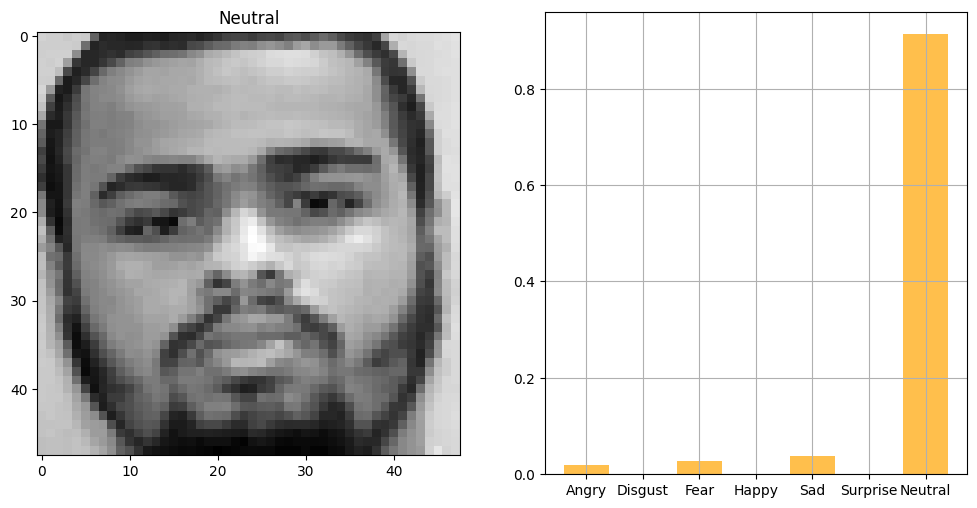

In [48]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 106)

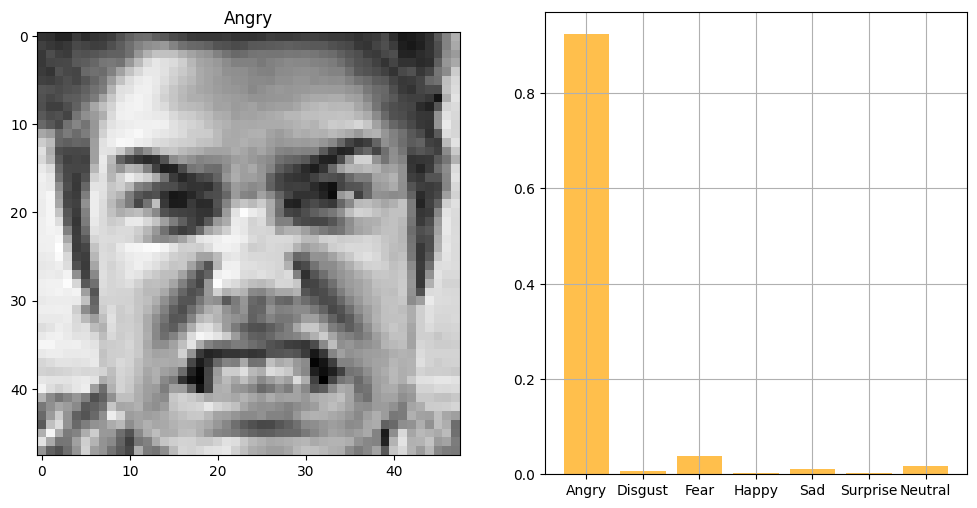

In [49]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 40)

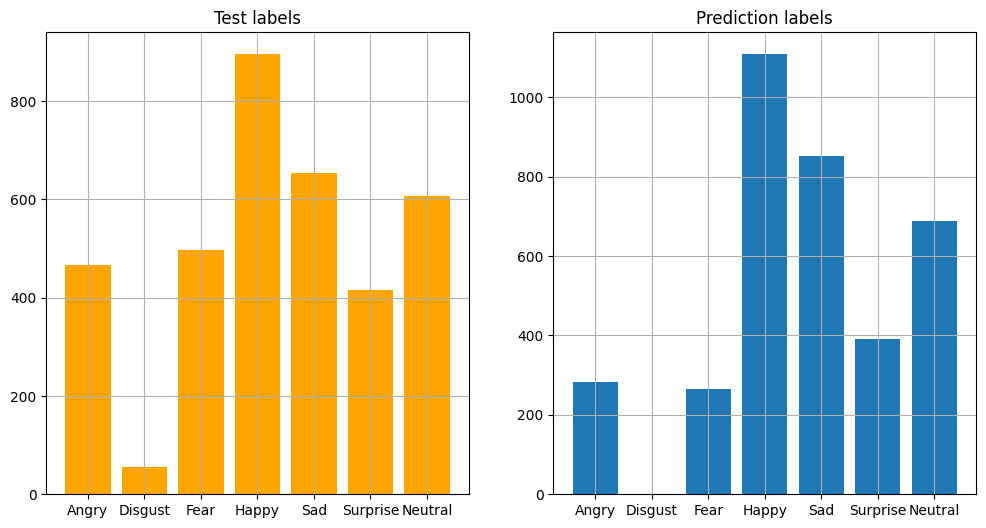

In [50]:
plot_compare_distributions(test_labels, pred_test_labels, title1='Test labels', title2='Prediction labels')

In [51]:
df_compare = pd.DataFrame()
df_compare['real'] = test_labels.argmax(axis=1)
df_compare['pred'] = pred_test_labels.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

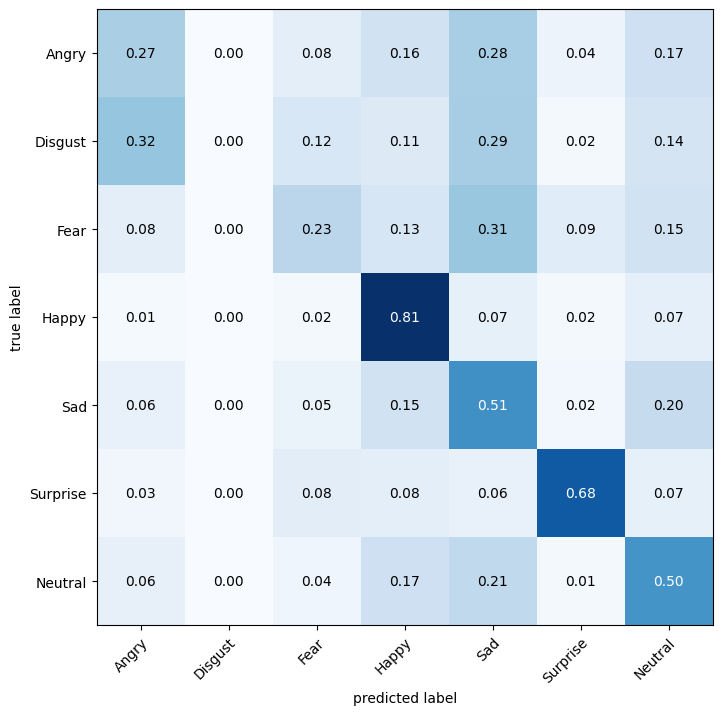

In [61]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))